In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200
%config InlineBackend.figure_format = 'svg'
# plt.rcParams['font.size'] = 15

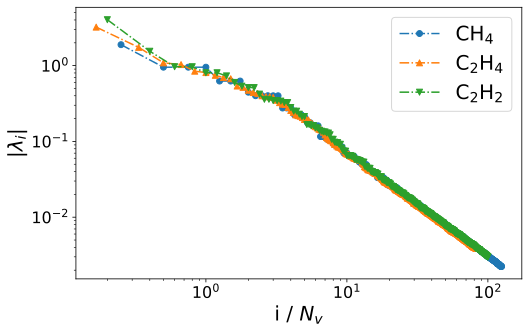

In [3]:
def get_wstat_eigenvalues(fname):
    eigens = []
    try:
        f = open(fname,'r')
    except:
        raise FileNotFoundError(fname)
    f.readline()
    line = f.readline()
    while line != '':
        eigens.append(float(line.split()[1]))
        line = f.readline()
    return eigens

prefix = "./G2_97/"
markers = ['o','^','v','P','*','x']
moles = [ 'CH4', 'C2H4', 'C2H2']
Nv = [4, 6,5]
labels = [r'$\mathrm{CH_4}$',r'$\mathrm{C_2H_4}$',r'$\mathrm{C_2H_2}$']
eigenvals = []
for m in moles:
    fname = prefix+'%s-PBE/wstat/o-wstat.converged.tab'%m
    eigenvals.append(get_wstat_eigenvalues(fname))

eigenvals = np.array(eigenvals)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in range(len(moles)):
    plt.loglog(np.arange(1,1+len(eigenvals[i]))/Nv[i],abs(eigenvals[i]),label=labels[i],ls='-.',marker=markers[i])
plt.legend(fontsize=20)
plt.xlabel(r'i / $N_v$',fontsize=20)
plt.ylabel(r'$|\lambda_i|$',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_yscale('log')
plt.show()
# fig.savefig("eigenvals.eps",bbox_inches='tight',dpi=200)
# fig.savefig("eigenvals.png",bbox_inches='tight',dpi=200)